In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Unsupervised Learning and Clustering

#### 10.1 Introduction

Until now, we have assumed that the training samples used to design a classifier were labeled by their category membership. Procedures that use labeled samples are said to be **supervised**. Now we will investigate a number of **unsupervised** procedures, which use **unlabeled samples**. That is, we will explore what can be done when all we have is a collection of samples without knowing their category.

You may wonder why anyone would be interested in such an unpromising problem, and whether it is possible to learn anything of value from unlabeled samples. There are at least five basic reasons for interest in unsupervised procedures:

1. **Cost of Labeling Data**: Collecting and labeling a large set of sample patterns can be surprisingly costly. For example, recorded speech is virtually free, but accurately labeling the speech — marking what word or phoneme is being uttered at each instant — can be very expensive and time-consuming. If a classifier can be crudely designed on a small set of labeled samples, and then "tuned up" by running it without supervision on a large unlabeled set, much time and trouble can be saved.

2. **Data Mining Applications**: One might wish to proceed in the reverse direction: train with large amounts of (less expensive) unlabeled data, and only then use supervision to label the groupings found. This may be appropriate for large data mining applications where the contents of a large database are not known beforehand.

3. **Dynamic Data**: In many applications, the characteristics of the patterns can change slowly over time. For example, in automated food classification as the seasons change, if these changes can be tracked by a classifier running in an unsupervised mode, improved performance can be achieved.

4. **Feature Extraction**: We can use unsupervised methods to find features that will then be useful for categorization. Unsupervised methods can act as a form of "smart preprocessing" or "smart feature extraction" that adapts based on the data itself.

5. **Data Exploration**: In the early stages of an investigation, it may be valuable to gain insight into the nature or structure of the data. The discovery of distinct subclasses, similarities among patterns, or major departures from expected characteristics may suggest significant changes in how the classifier should be designed.

The answer to whether it is possible, in principle, to learn anything from unlabeled data depends on the assumptions one is willing to accept. Theorems cannot be proved without premises. We begin with the restrictive assumption that the functional forms for the underlying probability densities are known, and the only unknown is a set of parameters.

#### 10.2 Mixture Densities and Identifiability

We assume that the complete probability structure for the problem is known except for the values of some parameters. Specifically, we make the following assumptions:

1. The samples come from a known number **c** of classes.
2. The prior probabilities $P(\omega_j)$ for each class are known for $j = 1, \dots, c$.
3. The forms for the class-conditional probability densities $p(x|\omega_j, \theta_j)$ are known for each class.
4. The values for the **c** parameter vectors $\theta_1, \dots, \theta_c$ are unknown.
5. The category labels are unknown.

Samples are assumed to be obtained by selecting a state of nature $\omega_j$ with probability $P(\omega_j)$, and then selecting an $x$ according to the probability law $p(x|\omega_j, \theta_j)$. Thus, the probability density function for the samples is given by:

$$
p(x|\theta) = \sum_{j=1}^{c} p(x|\omega_j, \theta_j) P(\omega_j)
$$

where $\theta = (\theta_1, \dots, \theta_c)$. This is called a **mixture density**, where the conditional densities $p(x|\omega_j, \theta_j)$ are the component densities, and the prior probabilities $P(\omega_j)$ are the mixing parameters.

The goal is to use samples drawn from this mixture density to estimate the unknown parameter vector $\theta$. Once we know $\theta$, we can decompose the mixture into its components and apply a Bayesian classifier on the derived densities, if classification is the final goal.

However, before seeking explicit solutions to this problem, we must ask whether it is possible in principle to recover $\theta$ from the mixture. Suppose we had an unlimited number of samples, and we used one of the nonparametric methods to determine the value of $p(x|\theta)$ for every $x$. If there is only one value of $\theta$ that will produce the observed values for$(p(x|\theta)$, then a solution is at least possible in principle. But if several different values of $\theta$ can produce the same values for $p(x|\theta)$, then it is impossible to obtain a unique solution.

This leads us to the concept of **identifiability**:

A density $p(x|\theta)$ is said to be **identifiable** if $\theta \neq \theta'$ implies that there exists an $x$ such that $p(x|\theta) \neq p(x|\theta')$.

Alternatively, a density $p(x|\theta)$ is not identifiable if we cannot recover a unique $\theta$, even from an infinite amount of data.

In situations where we cannot infer any of the individual parameters (i.e., components of $\theta$), the density is said to be **completely unidentifiable**, and unsupervised learning is impossible in principle.

**Example**: Consider the case where $x$ is binary, and the mixture model is defined as:

$$
p(x|\theta) = \frac{1}{2} \left[ \theta_1 (1-\theta_1)^{1-x} + \theta_2 x (1-\theta_2)^{1-x} \right]
$$

Suppose we know that $P(x = 1|\theta) = 0.6$, and hence $P(x = 0|\theta) = 0.4$. In this case, we know the function $p(x|\theta)$, but cannot determine $\theta$, and thus cannot extract the component distributions. The best we can say is that $\theta_1 + \theta_2 = 1.2$.

Thus, here we have a case in which the mixture distribution is completely unidentifiable.

**Identifiability in Continuous Distributions**:
For continuous distributions, identifiability is generally less problematic, although there can still be minor difficulties. For example, mixtures of normal distributions are usually identifiable, but the parameters in the mixture:

$$
p(x|\theta) = P(\omega_1) \mathcal{N}(x|\mu_1, \sigma_1^2) + P(\omega_2) \mathcal{N}(x|\mu_2, \sigma_2^2)
$$

are not identifiable if $P(\omega_1) = P(\omega_2)$, because $\mu_1$ and $\mu_2$ can be swapped without affecting $p(x|\theta)$.

#### Summary:

- **Identifiability** is crucial for unsupervised learning problems, as it allows us to recover the true parameters of the mixture model.
- While mixtures of normal distributions are generally identifiable, other cases (such as mixtures of discrete distributions) may face significant issues with identifiability.


NameError: name 'matplotlib' is not defined

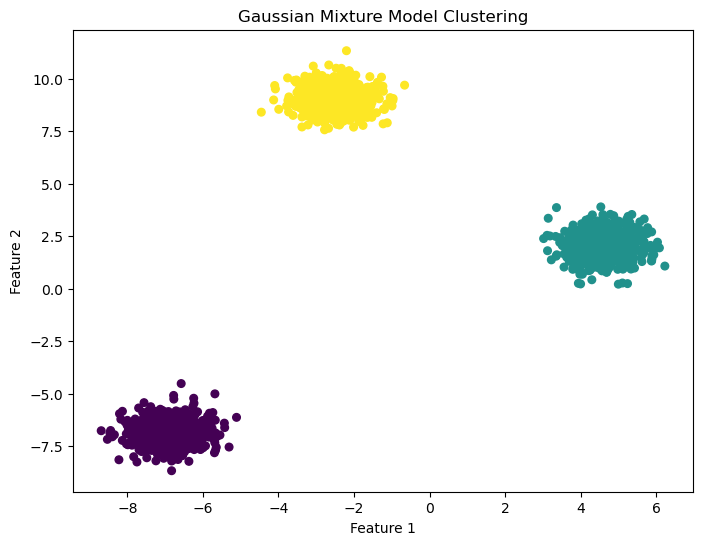

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Step 1: Create synthetic data
n_samples = 1500
random_state = 42

# Create 3 clusters (Gaussian blobs)
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=random_state)

# Step 2: Fit a Gaussian Mixture Model (Mixture of Gaussians)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Step 3: Predict the cluster labels
y_gmm = gmm.predict(X)

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))

# Plot the data points, coloring them based on their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=30)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the Gaussian components (mean of each Gaussian cluster)
ax = plt.gca()
for i in range(3):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color='black', lw=2)
    ax.add_patch(ell)

plt.show()


Converged at iteration 1


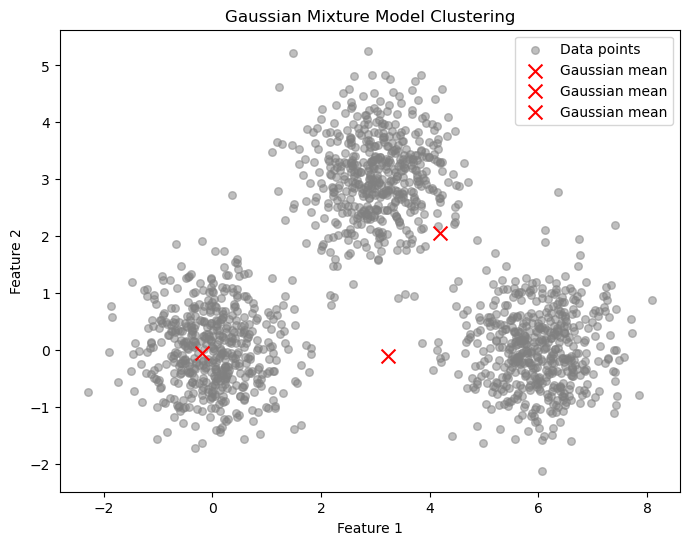

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create synthetic data
np.random.seed(42)

# Define parameters for the Gaussian components (mean, covariance, and number of samples)
mean1, cov1, size1 = [0, 0], [[0.5, 0], [0, 0.5]], 500
mean2, cov2, size2 = [3, 3], [[0.5, 0], [0, 0.5]], 500
mean3, cov3, size3 = [6, 0], [[0.5, 0], [0, 0.5]], 500

# Generate random data from three Gaussian distributions
data1 = np.random.multivariate_normal(mean1, cov1, size1)
data2 = np.random.multivariate_normal(mean2, cov2, size2)
data3 = np.random.multivariate_normal(mean3, cov3, size3)

# Combine the data
X = np.vstack([data1, data2, data3])

# Step 2: Initialize the Gaussian Mixture Parameters
def initialize_gmm(X, k):
    n_samples, n_features = X.shape
    
    # Randomly initialize the means (pick random samples from X)
    means = X[np.random.choice(n_samples, k, False)]
    
    # Initialize covariances (identity matrix for each cluster)
    covariances = np.array([np.identity(n_features)] * k)
    
    # Initialize mixture weights (uniform distribution)
    weights = np.ones(k) / k
    
    return means, covariances, weights

# Step 3: Expectation-Maximization Algorithm
def gaussian_pdf(X, mean, covariance):
    """Calculate the Gaussian PDF for data X given the mean and covariance."""
    n_features = X.shape[1]
    diff = X - mean
    inv_cov = np.linalg.inv(covariance)
    det_cov = np.linalg.det(covariance)
    exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
    return (1 / np.sqrt((2 * np.pi)**n_features * det_cov)) * np.exp(exponent)

def expectation_maximization(X, k, n_iterations=100, tol=1e-6):
    # Initialize GMM parameters
    means, covariances, weights = initialize_gmm(X, k)
    
    n_samples, n_features = X.shape
    log_likelihoods = []
    
    for iteration in range(n_iterations):
        # E-Step: Compute responsibilities
        responsibilities = np.zeros((n_samples, k))
        
        # Calculate the weighted probability for each cluster and sample
        for i in range(k):
            responsibilities[:, i] = weights[i] * gaussian_pdf(X, means[i], covariances[i])
        
        # Normalize to get probabilities (responsibilities)
        responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)
        
        # M-Step: Update parameters based on responsibilities
        Nk = responsibilities.sum(axis=0)  # Total responsibility for each cluster
        
        # Update means
        means = (responsibilities.T @ X) / Nk[:, np.newaxis]
        
        # Update covariances
        for i in range(k):
            diff = X - means[i]
            covariances[i] = (responsibilities[:, i] * diff.T) @ diff / Nk[i]
        
        # Update weights
        weights = Nk / n_samples
        
        # Compute log-likelihood for convergence check
        log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break
    
    return means, covariances, weights, log_likelihoods

# Step 4: Run the EM Algorithm
k = 3  # Number of components (clusters)
means, covariances, weights, log_likelihoods = expectation_maximization(X, k)

# Step 5: Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=30, label='Data points', alpha=0.5)

# Plot the Gaussian components (means)
for mean in means:
    plt.scatter(mean[0], mean[1], c='red', s=100, marker='x', label='Gaussian mean')

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Maximum-Likelihood Estimates

Suppose we are given a set \( D = \{ x_1, \dots, x_n \} \) of \( n \) unlabeled samples drawn independently from the mixture density:

$$
p(x | \theta) = \sum_{j=1}^{c} p(x | \omega_j, \theta_j) P(\omega_j),
$$

where the full parameter vector \( \theta \) is fixed but unknown. The likelihood of the observed samples is, by definition, the joint density:

$$
p(D | \theta) = \prod_{k=1}^{n} p(x_k | \theta).
$$

The maximum-likelihood estimate \( \hat{\theta} \) is that value of \( \theta \) that maximizes \( p(D | \theta) \). If we assume that \( p(D | \theta) \) is a differentiable function of \( \theta \), then we can derive some interesting necessary conditions for \( \hat{\theta} \).

Let \( l \) be the logarithm of the likelihood, and let \( \nabla_{\theta_i} l \) be the gradient of \( l \) with respect to \( \theta_i \):

$$
l = \sum_{k=1}^{n} \ln p(x_k | \theta).
$$

Then, the gradient of the log-likelihood with respect to \( \theta_i \) is:

$$
\nabla_{\theta_i} l = \nabla_{\theta_i} \left[ \prod_{k=1}^{n} p(x_k | \omega_j, \theta_j) P(\omega_j) \right].
$$

Assuming that the elements of \( \theta_i \) and \( \theta_j \) are functionally independent if \( i \neq j \), and introducing the posterior probability:

$$
P(\omega_i | x_k, \theta) = \frac{p(x_k | \omega_i, \theta_i) P(\omega_i)}{p(x_k | \theta)},
$$

we can write the gradient of the log-likelihood in the following form:

$$
\nabla_{\theta_i} l = \sum_{k=1}^{n} P(\omega_i | x_k, \theta) \nabla_{\theta_i} \ln p(x_k | \omega_i, \theta_i).
$$

Since the gradient must vanish at the value of $ \theta_i $ that maximizes $ l $, the maximum-likelihood estimate $ \hat{\theta_i} $ must satisfy the following conditions:

$$
\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\theta}) \nabla_{\theta_i} \ln p(x_k | \omega_i, \hat{\theta_i}) = 0, \quad i = 1, \dots, c.
$$

### Maximum-Likelihood Estimate of $ P(\omega_i) $

We can generalize these results to include the prior probabilities $ P(\omega_i) $ among the unknown quantities. In this case, the search for the maximum value of $ p(D | \theta) $ extends over both $ \theta $ and $ P(\omega_i) $, subject to the constraints:

$$
P(\omega_i) \geq 0, \quad i = 1, \dots, c,
$$

and

$$
\sum_{i=1}^{c} P(\omega_i) = 1.
$$

Let $ \hat{P}(\omega_i) $ be the maximum-likelihood estimate for $ P(\omega_i) $, and let $ \hat{\theta_i} $ be the maximum-likelihood estimate for $ \theta_i $. It can be shown that if the likelihood function is differentiable and $ \hat{P}(\omega_i) > 0 $ for any $ i $, then $ \hat{P}(\omega_i) $ and $ \hat{\theta_i} $ must satisfy:

$$
\hat{P}(\omega_i) = \frac{1}{n} \sum_{k=1}^{n} P(\omega_i | x_k, \hat{\theta}),
$$

and

$$
\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\theta}) \nabla_{\theta_i} \ln p(x_k | \omega_i, \hat{\theta_i}) = 0.
$$

where

$$
P(\omega_i | x_k, \hat{\theta}) = \frac{p(x_k | \omega_i, \hat{\theta_i}) \hat{P}(\omega_i)}{\sum_{j=1}^{c} p(x_k | \omega_j, \hat{\theta_j}) \hat{P}(\omega_j)}.
$$

### Interpretation of the Equations

- Equation (11) states that the maximum-likelihood estimate of the probability of a category is the average over the entire data set of the estimate derived from each sample, with each sample weighted equally.
- Equation (13) is related to Bayes' Theorem. In estimating the probability for class $ \omega_i $, the numerator on the right-hand side depends on $ \hat{\theta_i} $ and not the full $ \hat{\theta} $ directly.
- Equation (12) ensures that the probability density is maximized as a function of $ \theta_i $, which is essential for the maximum-likelihood solution.

## Application to Normal Mixtures

We now apply these results to the case where the component densities are multivariate normal:

$$
p(x | \omega_i, \theta_i) \sim N(\mu_i, \Sigma_i).
$$

Here, the following cases can arise, depending on which parameters are known and which are unknown:

| Case  | $ \mu_i $ | $ \Sigma_i $ | $ P(\omega_i) $ |
|------|-------------|----------------|-------------------|
| 1    | ?           | ×              | ×                 |
| 2    | ?           | ?              | ×                 |
| 3    | ?           | ?              | ?                 |

- **Case 1**: This is the simplest case, where only $ \mu_i $ is unknown, and will be considered in detail.
- **Case 2**: This is more realistic but involves more complex computations.
- **Case 3**: This case represents a scenario where both the means and covariances are unknown, and it cannot be solved by maximum-likelihood methods alone.

We will focus on **Case 1** as it provides a pedagogical understanding.


##  Case 1: Unknown Mean Vectors

If the only unknown quantities are the mean vectors $ \mu_i $, then $ \theta_i $ consists of the components of $ \mu_i $. Equation (8) can then be used to obtain necessary conditions for the maximum-likelihood estimate of $ \mu_i $.

The likelihood is given by:

$$
\ln p(x | \omega_i, \mu_i) = -\frac{1}{2} \ln \left( (2\pi)^{d/2} |\Sigma_i|^{1/2} \right) - \frac{1}{2} (x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i).
$$

Its derivative with respect to $ \mu_i $ is:

$$
\nabla_{\mu_i} \ln p(x | \omega_i, \mu_i) = \Sigma_i^{-1} (x - \mu_i).
$$

Thus, according to Eq. (8), the maximum-likelihood estimate $ \hat{\mu}_i $ must satisfy:

$$
\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\mu}) \Sigma_i^{-1} (x_k - \hat{\mu}_i) = 0,
$$

where $ \hat{\mu} = (\hat{\mu}_1, \dots, \hat{\mu}_c) $.

After multiplying by $ \Sigma_i $ and rearranging terms, we obtain the solution:

$$
\hat{\mu}_i = \frac{\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\mu}) x_k}{\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\mu})}.
$$

### Interpretation

This equation shows that the maximum-likelihood estimate for $ \mu_i $ is a weighted average of the samples, where the weight for the $ k $-th sample is the estimate of how likely $ x_k $ belongs to the $ i $-th class. 

- If $ P(\omega_i | x_k, \hat{\mu}) = 1.0 $ for some samples and $ 0.0 $ for others, $ \hat{\mu}_i $ becomes the mean of those samples estimated to belong to the $ i $-th class.
- More generally, if $ \hat{\mu}_i $ is close to the true $ \mu_i $, then $ P(\omega_i | x_k, \hat{\mu}) $ approximates the true posterior probability.

However, Eq. (17) does not give $ \hat{\mu}_i $ explicitly. Substituting:

$$
P(\omega_i | x_k, \hat{\mu}) = \frac{p(x_k | \omega_i, \hat{\mu}_i) P(\omega_i)}{\sum_{j=1}^{c} p(x_k | \omega_j, \hat{\mu}_j) P(\omega_j)},
$$

with:

$$
p(x | \omega_i, \hat{\mu}_i) \sim N(\hat{\mu}_i, \Sigma_i),
$$

leads to a set of coupled, simultaneous, nonlinear equations. These equations do not always have a unique solution, and each solution must be tested to identify the one that maximizes the likelihood.

### Iterative Solution

If we have a way to obtain good initial estimates $ \hat{\mu}_i^{(0)} $ for the unknown means, the following iterative scheme can be used to improve the estimates:

$$
\hat{\mu}_i^{(j+1)} = \frac{\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\mu}^{(j)}) x_k}{\sum_{k=1}^{n} P(\omega_i | x_k, \hat{\mu}^{(j)})}.
$$

This is essentially a **gradient ascent** or **hill-climbing** procedure for maximizing the log-likelihood function.

- If the overlap between component densities is small, the coupling between classes is small, and convergence will be fast.
- However, when convergence occurs, it guarantees only that the gradient is zero. There is no assurance of reaching the global maximum.

### Notes on Mis-specification

- If the model is mis-specified (e.g., assuming the wrong number of clusters), the log-likelihood may actually decrease.
- Careful testing and initialization are necessary to ensure meaningful results.



In [1]:
import numpy as np

def gaussian_pdf(x, mean, covariance):
    """
    Computes the probability density function of a multivariate Gaussian.
    
    Parameters:
    - x: Data point (d-dimensional array)
    - mean: Mean vector (d-dimensional array)
    - covariance: Covariance matrix (d x d array)
    
    Returns:
    - Probability density value.
    """
    d = len(mean)
    det_cov = np.linalg.det(covariance)
    inv_cov = np.linalg.inv(covariance)
    diff = x - mean
    exponent = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff)
    return (1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_cov))) * np.exp(exponent)


def estimate_means(data, initial_means, covariances, priors, max_iter=100, tol=1e-6):
    """
    Estimates the means of the Gaussian components using the iterative maximum likelihood method.
    
    Parameters:
    - data: Dataset (n x d array, where n is the number of samples and d is the dimension)
    - initial_means: Initial guesses for the means (c x d array, where c is the number of components)
    - covariances: Known covariance matrices for each component (c x d x d array)
    - priors: Prior probabilities for each component (c-dimensional array)
    - max_iter: Maximum number of iterations (default: 100)
    - tol: Convergence tolerance (default: 1e-6)
    
    Returns:
    - Estimated means (c x d array)
    """
    n, d = data.shape
    c = len(initial_means)
    means = initial_means.copy()

    for iteration in range(max_iter):
        # Expectation step: Compute responsibilities
        responsibilities = np.zeros((n, c))
        for i in range(c):
            for k in range(n):
                numerator = priors[i] * gaussian_pdf(data[k], means[i], covariances[i])
                denominator = sum(
                    priors[j] * gaussian_pdf(data[k], means[j], covariances[j])
                    for j in range(c)
                )
                responsibilities[k, i] = numerator / denominator

        # Maximization step: Update means
        new_means = np.zeros_like(means)
        for i in range(c):
            weighted_sum = sum(responsibilities[k, i] * data[k] for k in range(n))
            total_weight = sum(responsibilities[k, i] for k in range(n))
            new_means[i] = weighted_sum / total_weight

        # Check for convergence
        if np.linalg.norm(new_means - means) < tol:
            break

        means = new_means

    return means


# Example usage
if __name__ == "__main__":
    # Synthetic dataset
    data = np.array([
        [1.0, 2.0],
        [1.5, 1.8],
        [5.0, 8.0],
        [8.0, 8.0],
        [1.0, 0.6],
        [9.0, 11.0],
    ])

    # Initial parameters
    initial_means = np.array([[2.0, 2.0], [6.0, 6.0]])
    covariances = np.array([
        [[1.0, 0.0], [0.0, 1.0]],  # Component 1 covariance
        [[1.0, 0.0], [0.0, 1.0]],  # Component 2 covariance
    ])
    priors = np.array([0.5, 0.5])

    # Estimate means
    estimated_means = estimate_means(data, initial_means, covariances, priors)
    print("Estimated Means:")
    print(estimated_means)


Estimated Means:
[[1.16666667 1.46666667]
 [7.33333332 8.99999998]]


In [ ]:
import math

def gaussian_pdf(x, mean, covariance):
    """
    Computes the probability density function of a multivariate Gaussian.
    
    Parameters:
    - x: Data point (list of floats)
    - mean: Mean vector (list of floats)
    - covariance: Covariance matrix (list of lists)
    
    Returns:
    - Probability density value (float).
    """
    d = len(mean)
    det_cov = determinant(covariance)
    inv_cov = inverse_matrix(covariance)
    diff = [x[i] - mean[i] for i in range(d)]
    exponent = -0.5 * matrix_multiply(
        [matrix_multiply(diff, inv_cov)], [[diff[i]] for i in range(d)]
    )[0][0]
    return (1 / ((2 * math.pi) ** (d / 2) * math.sqrt(det_cov))) * math.exp(exponent)


def matrix_multiply(A, B):
    """
    Multiplies two matrices A and B.
    """
    return [[sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]


def determinant(matrix):
    """
    Computes the determinant of a square matrix.
    """
    if len(matrix) == 1:
        return matrix[0][0]
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for col in range(len(matrix)):
        submatrix = [row[:col] + row[col + 1:] for row in matrix[1:]]
        det += ((-1) ** col) * matrix[0][col] * determinant(submatrix)
    return det


def transpose(matrix):
    """
    Transposes a matrix.
    """
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]


def inverse_matrix(matrix):
    """
    Computes the inverse of a square matrix.
    """
    det = determinant(matrix)
    if len(matrix) == 2:
        return [[matrix[1][1] / det, -matrix[0][1] / det], [-matrix[1][0] / det, matrix[0][0] / det]]

    cofactors = []
    for r in range(len(matrix)):
        cofactor_row = []
        for c in range(len(matrix)):
            minor = [row[:c] + row[c + 1:] for row in (matrix[:r] + matrix[r + 1:])]
            cofactor_row.append(((-1) ** (r + c)) * determinant(minor))
        cofactors.append(cofactor_row)
    cofactors = transpose(cofactors)
    return [[cofactors[i][j] / det for j in range(len(matrix))] for i in range(len(matrix))]


def estimate_means(data, initial_means, covariances, priors, max_iter=100, tol=1e-6):
    """
    Estimates the means of the Gaussian components using the iterative maximum likelihood method.
    
    Parameters:
    - data: Dataset (list of lists, n x d)
    - initial_means: Initial guesses for the means (list of lists, c x d)
    - covariances: Known covariance matrices for each component (list of lists of lists, c x d x d)
    - priors: Prior probabilities for each component (list of floats)
    - max_iter: Maximum number of iterations (default: 100)
    - tol: Convergence tolerance (default: 1e-6)
    
    Returns:
    - Estimated means (list of lists, c x d)
    """
    n, d = len(data), len(data[0])
    c = len(initial_means)
    means = [mean[:] for mean in initial_means]

    for _ in range(max_iter):
        # Expectation step: Compute responsibilities
        responsibilities = [[0.0] * c for _ in range(n)]
        for i in range(c):
            for k in range(n):
                numerator = priors[i] * gaussian_pdf(data[k], means[i], covariances[i])
                denominator = sum(
                    priors[j] * gaussian_pdf(data[k], means[j], covariances[j])
                    for j in range(c)
                )
                responsibilities[k][i] = numerator / denominator

        # Maximization step: Update means
        new_means = [[0.0] * d for _ in range(c)]
        for i in range(c):
            total_weight = sum(responsibilities[k][i] for k in range(n))
            for j in range(d):
                weighted_sum = sum(responsibilities[k][i] * data[k][j] for k in range(n))
                new_means[i][j] = weighted_sum / total_weight

        # Check for convergence
        if all(
            math.sqrt(sum((new_means[i][j] - means[i][j]) ** 2 for j in range(d))) < tol
            for i in range(c)
        ):
            break

        means = new_means

    return means


# Example usage
if __name__ == "__main__":
    # Synthetic dataset
    data = [
        [1.0, 2.0],
        [1.5, 1.8],
        [5.0, 8.0],
        [8.0, 8.0],
        [1.0, 0.6],
        [9.0, 11.0],
    ]

    # Initial parameters
    initial_means = [[2.0, 2.0], [6.0, 6.0]]
    covariances = [
        [[1.0, 0.0], [0.0, 1.0]],  # Component 1 covariance
        [[1.0, 0.0], [0.0, 1.0]],  # Component 2 covariance
    ]
    priors = [0.5, 0.5]

    # Estimate means
    estimated_means = estimate_means(data, initial_means, covariances, priors)
    print("Estimated Means:")
    for mean in estimated_means:
        print(mean)


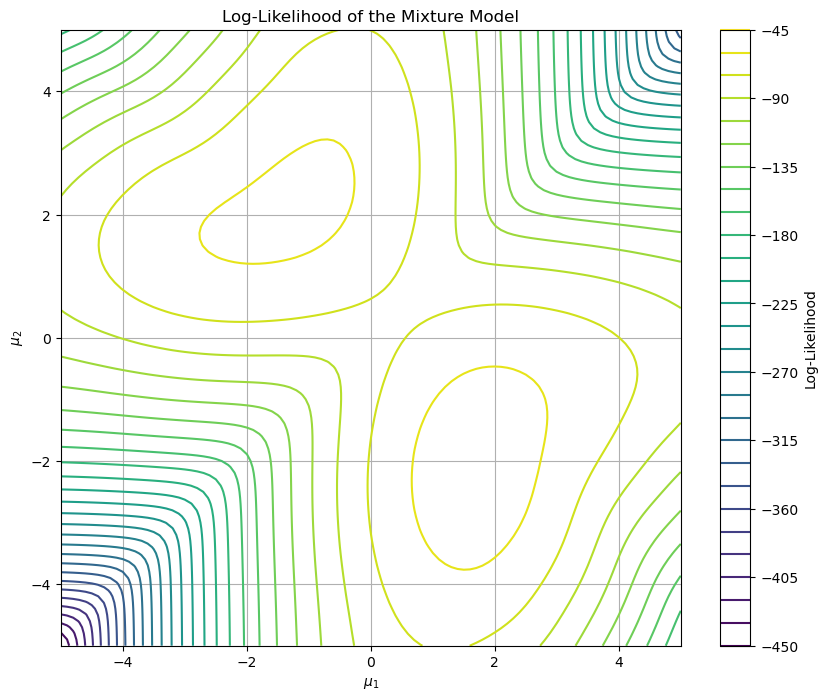

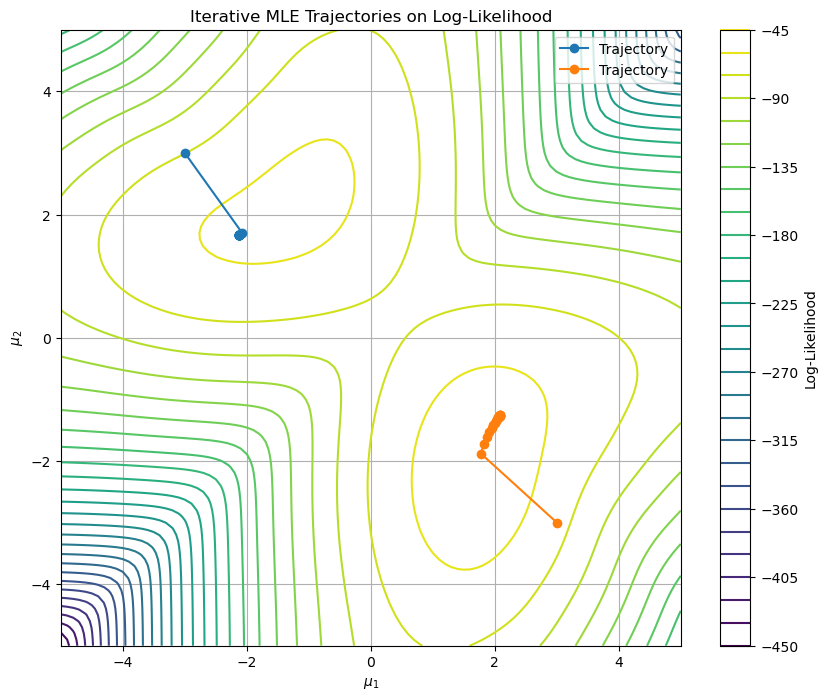

In [3]:
### Mixture Model Analysis: Log-Likelihood Behavior for Two Univariate Gaussians

import math
import matplotlib.pyplot as plt
import random

# Function to compute the probability density of a 1D Gaussian
def gaussian_pdf(x, mean, variance):
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-((x - mean) ** 2) / (2 * variance))

# Data: Sample values
samples = [
    0.608, -1.590, 0.235, 3.949, -2.249, 2.704, -2.473, 0.672, 0.262, 1.072,
    -1.773, 0.537, 3.240, 2.400, -2.499, 2.608, -3.458, 0.257, 2.569, 1.415,
    1.410, -2.653, 1.396, 3.286, -0.712
]

# Parameters for the mixture model
prior_1 = 1 / 3
prior_2 = 2 / 3
variance_1 = variance_2 = 1  # Fixed variances

# Log-likelihood function
def log_likelihood(mu1, mu2, data):
    likelihood = 0
    for x in data:
        p1 = prior_1 * gaussian_pdf(x, mu1, variance_1)
        p2 = prior_2 * gaussian_pdf(x, mu2, variance_2)
        likelihood += math.log(p1 + p2)
    return likelihood

# Generate a grid of values for \( \mu_1 \) and \( \mu_2 \)
mu1_values = [i * 0.1 for i in range(-50, 51)]
mu2_values = [i * 0.1 for i in range(-50, 51)]

# Compute the log-likelihood for each pair of \( \mu_1 \) and \( \mu_2 \)
log_likelihood_values = []
for mu1 in mu1_values:
    row = []
    for mu2 in mu2_values:
        row.append(log_likelihood(mu1, mu2, samples))
    log_likelihood_values.append(row)

# Plot the log-likelihood as a function of \( \mu_1 \) and \( \mu_2 \)
plt.figure(figsize=(10, 8))
plt.contour(mu1_values, mu2_values, log_likelihood_values, levels=30, cmap="viridis")
plt.colorbar(label="Log-Likelihood")
plt.title("Log-Likelihood of the Mixture Model")
plt.xlabel("$\mu_1$")
plt.ylabel("$\mu_2$")
plt.grid(True)
plt.show()

# Iterative MLE using Eq. 18
initial_guesses = [(-3, 3), (3, -3)]  # Two starting points
trajectories = []

for mu1_0, mu2_0 in initial_guesses:
    mu1, mu2 = mu1_0, mu2_0
    trajectory = [(mu1, mu2)]
    for _ in range(20):
        weights_1 = [
            prior_1 * gaussian_pdf(x, mu1, variance_1) /
            (prior_1 * gaussian_pdf(x, mu1, variance_1) + prior_2 * gaussian_pdf(x, mu2, variance_2))
            for x in samples
        ]
        weights_2 = [1 - w for w in weights_1]

        mu1 = sum(w * x for w, x in zip(weights_1, samples)) / sum(weights_1)
        mu2 = sum(w * x for w, x in zip(weights_2, samples)) / sum(weights_2)

        trajectory.append((mu1, mu2))

    trajectories.append(trajectory)

# Plot the trajectories on the log-likelihood contour
plt.figure(figsize=(10, 8))
plt.contour(mu1_values, mu2_values, log_likelihood_values, levels=30, cmap="viridis")
for trajectory in trajectories:
    trajectory_x, trajectory_y = zip(*trajectory)
    plt.plot(trajectory_x, trajectory_y, marker="o", linestyle="-", label="Trajectory")
plt.colorbar(label="Log-Likelihood")
plt.title("Iterative MLE Trajectories on Log-Likelihood")
plt.xlabel("$\mu_1$")
plt.ylabel("$\mu_2$")
plt.legend()
plt.grid(True)
plt.show()


## Mixtures of Two 1D Gaussians

This notebook demonstrates the behavior of iterative maximum-likelihood estimation for a mixture of two one-dimensional Gaussian components. 

---

## Problem Description

The mixture density is given by:

$$
p(x | \mu_1, \mu_2) = \frac{1}{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x - \mu_1)^2}{2}\right) + \frac{2}{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x - \mu_2)^2}{2}\right),
$$

where:
- $ \omega_1 $ and $ \omega_2 $ represent the two Gaussian components.
- $ \mu_1 $ and $ \mu_2 $ are the means of the respective components.

### Data Generation
The following 25 samples were generated from the mixture density, with $ \mu_1 = -2 $ and $ \mu_2 = 2 $:

| $ k $ | $ x_k $  | $ \omega_1 $ | $ \omega_2 $ |
|--------|------------|----------------|----------------|
| 1      | 0.608      | ×              |                |
| 2      | -1.590     |                | ×              |
| 3      | 0.235      | ×              |                |
| ...    | ...        | ...            | ...            |
| 25     | -0.712     | ×              |                |

---

## Log-Likelihood Function

The log-likelihood function for the mixture model is:

$$
l(\mu_1, \mu_2) = \sum_{k=1}^n \ln p(x_k | \mu_1, \mu_2).
$$

This notebook computes the log-likelihood for various values of $ \mu_1 $ and $ \mu_2 $, and visualizes how $ l(\mu_1, \mu_2) $ varies over the parameter space.

---

## Iterative Maximum-Likelihood Estimation

The iterative update for $ \mu_1 $ and $ \mu_2 $ is given by:

$$
\mu_1^{(j+1)} = \frac{\sum_{k=1}^n P(\omega_1 | x_k, \mu^{(j)}) x_k}{\sum_{k=1}^n P(\omega_1 | x_k, \mu^{(j)})},
$$

$$
\mu_2^{(j+1)} = \frac{\sum_{k=1}^n P(\omega_2 | x_k, \mu^{(j)}) x_k}{\sum_{k=1}^n P(\omega_2 | x_k, \mu^{(j)})}.
$$

The probabilities $ P(\omega_i | x_k, \mu) $ are computed using Bayes' theorem.

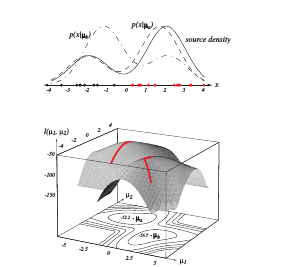

(Above) The source mixture density used to generate sample data, and two maximum- likelihood estimates based on the data in the table. (Bottom) Log-likelihood of a mixture model consisting of two univariate Gaussians as a function of their means, for the data in the table. Trajectories for the iterative maximum-likelihood estimation of the means of a two-Gaussian mixture model based on the data are shown as red lines. Two local optima (with log-likelihoods -52.2 and -56.7) correspond to the two density estimates shown above.

### Multiple Solutions
- Two local optima are identified: 
  - $ \mu_1 = -2.130, \mu_2 = 1.668 $ with log-likelihood $ l = -52.2 $.
  - $ \mu_1 = 2.085, \mu_2 = -1.257 $ with log-likelihood $ l = -56.7 $.
- These correspond to interchanged roles of $ \mu_1 $ and $ \mu_2 $.

---

## Visualizations

- **Log-Likelihood Contour Plot:** Displays $ l(\mu_1, \mu_2) $ across a range of values.
- **Optimization Trajectories:** Shows the iterative paths starting from different initial guesses.
- **Density Comparison:** True source density vs. estimated densities.

---

## Observations

- If the initial estimates are symmetric $( \mu_1^{(0)} = \mu_2^{(0)} $), convergence to a saddle point occurs in one step.
- Multiple optima emphasize the need for careful initialization in iterative procedures.
- The mixture model is not identifiable when prior probabilities are equal, leading to symmetric solutions.


Estimated μ1: -2.1294980589322874
Estimated μ2: 1.6684159138241639


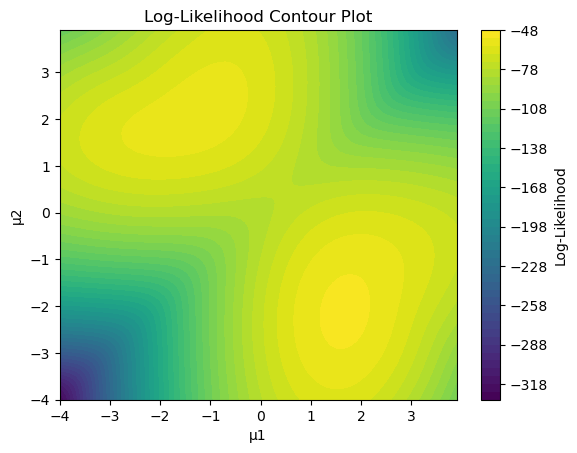

In [5]:
# Mixtures of Two 1D Gaussians: Implementation Without NumPy

# Importing required libraries
import math
import random
import matplotlib.pyplot as plt
from itertools import product

# Given sample data
data = [
    0.608, -1.590, 0.235, 3.949, -2.249, 2.704, -2.473, 0.672, 0.262,
    1.072, -1.773, 0.537, 3.240, 2.400, -2.499, 2.608, -3.458, 0.257,
    2.569, 1.415, 1.410, -2.653, 1.396, 3.286, -0.712
]

# Mixture model parameters
weights = [1/3, 2/3]  # Prior probabilities for ω1 and ω2
std_dev = 1  # Standard deviation for both components

# Gaussian PDF function
def gaussian(x, mean, std_dev):
    coefficient = 1 / (std_dev * math.sqrt(2 * math.pi))
    exponent = math.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))
    return coefficient * exponent

# Mixture model PDF
def mixture_pdf(x, mu1, mu2):
    return weights[0] * gaussian(x, mu1, std_dev) + weights[1] * gaussian(x, mu2, std_dev)

# Log-likelihood function
def log_likelihood(mu1, mu2, data):
    ll = 0
    for x in data:
        ll += math.log(mixture_pdf(x, mu1, mu2))
    return ll

# Expectation-Maximization updates
def expectation_maximization(data, initial_mu1, initial_mu2, iterations=10):
    mu1, mu2 = initial_mu1, initial_mu2

    for _ in range(iterations):
        # E-step: Calculate responsibilities
        responsibilities = []
        for x in data:
            r1 = weights[0] * gaussian(x, mu1, std_dev)
            r2 = weights[1] * gaussian(x, mu2, std_dev)
            normalization = r1 + r2
            responsibilities.append((r1 / normalization, r2 / normalization))
        
        # M-step: Update means
        weighted_sum_mu1 = sum(r[0] * x for r, x in zip(responsibilities, data))
        weighted_sum_mu2 = sum(r[1] * x for r, x in zip(responsibilities, data))
        weight_sum_mu1 = sum(r[0] for r in responsibilities)
        weight_sum_mu2 = sum(r[1] for r in responsibilities)
        mu1 = weighted_sum_mu1 / weight_sum_mu1
        mu2 = weighted_sum_mu2 / weight_sum_mu2
    
    return mu1, mu2

# Visualization of log-likelihood
def plot_log_likelihood(data, mu1_range, mu2_range):
    # Create a 2D grid for mu1 and mu2
    mu1_grid, mu2_grid = list(mu1_range), list(mu2_range)
    ll_grid = [[log_likelihood(mu1, mu2, data) for mu2 in mu2_grid] for mu1 in mu1_grid]

    # Convert lists to appropriate format for contourf
    mu1_grid, mu2_grid = list(mu1_range), list(mu2_range)

    # Plot the log-likelihood contour
    plt.contourf(mu1_grid, mu2_grid, ll_grid, levels=50, cmap="viridis")
    plt.colorbar(label="Log-Likelihood")
    plt.xlabel("μ1")
    plt.ylabel("μ2")
    plt.title("Log-Likelihood Contour Plot")
    plt.show()


# Initial parameters
initial_mu1, initial_mu2 = -1, 1
iterations = 15

# Run EM algorithm
estimated_mu1, estimated_mu2 = expectation_maximization(data, initial_mu1, initial_mu2, iterations)

# Print results
print(f"Estimated μ1: {estimated_mu1}")
print(f"Estimated μ2: {estimated_mu2}")

# Visualize log-likelihood
mu1_range = [i * 0.1 for i in range(-40, 40)]  # Range for μ1
mu2_range = [i * 0.1 for i in range(-40, 40)]  # Range for μ2
plot_log_likelihood(data, mu1_range, mu2_range)


## Case 2: All Parameters Unknown

In this section, we discuss the scenario where all parameters of a Gaussian mixture model $(\mu_i$, $\Sigma_i$, and $P(\omega_i)$) are unknown. The maximum likelihood estimation (MLE) in such cases can lead to singular solutions unless appropriate constraints or modifications are applied.

---

## Singular Solutions in Maximum Likelihood Estimation

Consider a one-dimensional Gaussian mixture:
$$
p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) + \frac{1}{\sqrt{2\pi}\sqrt{2}} \exp\left(-\frac{x^2}{2}\right).
$$

The likelihood function for $n$ samples drawn from this density is:
$$
L(\mu, \sigma^2) = \prod_{k=1}^n p(x_k | \mu, \sigma^2).
$$

Suppose we set $\mu = x_1$, the value of the first sample. Then the density becomes:
$$
p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} + \frac{1}{\sqrt{2\pi}\sqrt{2}} \exp\left(-\frac{x^2}{2}\right).
$$

As $\sigma \to 0$, the likelihood becomes arbitrarily large, leading to singular solutions. To avoid such singularities, we focus on the largest finite local maxima of the likelihood function.

---

## Estimating Parameters $\mu_i$, $\Sigma_i$, and $P(\omega_i)$

The following equations provide estimates for the parameters:

1. **Class Prior Probabilities:**
   $$
   \hat{P}(\omega_i) = \frac{1}{n} \sum_{k=1}^n \hat{P}(\omega_i | x_k, \theta).
   $$

2. **Mean Vectors:**
   $$
   \hat{\mu}_i = \frac{\sum_{k=1}^n \hat{P}(\omega_i | x_k, \theta)x_k}{\sum_{k=1}^n \hat{P}(\omega_i | x_k, \theta)}.
   $$

3. **Covariance Matrices:**
   $$
   \hat{\Sigma}_i = \frac{\sum_{k=1}^n \hat{P}(\omega_i | x_k, \theta)(x_k - \mu_i)(x_k - \mu_i)^T}{\sum_{k=1}^n \hat{P}(\omega_i | x_k, \theta)}.
   $$

4. **Class-Conditional Probabilities:**
   $$
   \hat{P}(\omega_i | x_k, \theta) = \frac{p(x_k | \omega_i, \theta)\hat{P}(\omega_i)}{\sum_{j=1}^c p(x_k | \omega_j, \theta)\hat{P}(\omega_j)}.
   $$

Here, $p(x_k | \omega_i, \theta)$ is given by:
$$
\frac{|\Sigma_i|^{-1/2}}{(2\pi)^{d/2}} \exp\left(-\frac{1}{2}(x_k - \mu_i)^T \Sigma_i^{-1} (x_k - \mu_i)\right).
$$

---

## Implementation Notes

- **Initial Estimates:** Use initial guesses for the parameters $\theta$ to compute $\hat{P}(\omega_i | x_k, \theta)$ iteratively.
- **Convergence:** Update $\mu_i$, $\Sigma_i$, and $P(\omega_i)$ using the equations above until convergence.
- **Avoiding Singular Solutions:**
  - Assume diagonal covariance matrices to simplify computation and reduce the risk of singularities.
  - If possible, assume equal covariance matrices across classes.

---

## Advantages of Constraints

By assuming diagonal or equal covariance matrices:

1. **Reduced Complexity:** Fewer parameters to estimate.
2. **Faster Convergence:** Simpler equations lead to faster computations.
3. **Avoidance of Singularities:** Eliminates pathological cases in MLE.


Means:
[[ 1.99200527  3.003386  ]
 [-1.98192827 -2.9540472 ]]

Covariances:
[[[ 0.96742339  0.51587596]
  [ 0.51587596  1.46170857]]

 [[ 1.11996842 -0.18681714]
  [-0.18681714  0.73566808]]]

Weights:
[0.49972272 0.50027728]


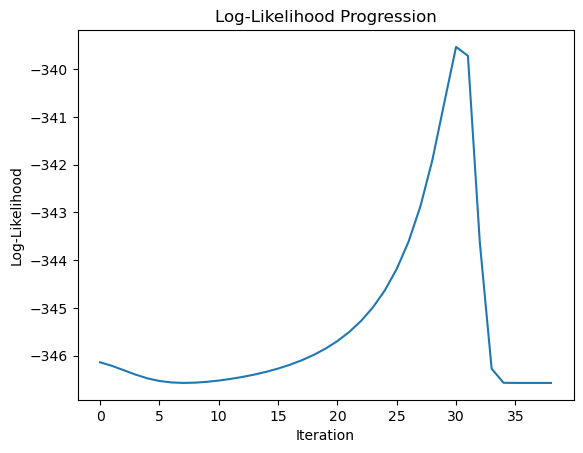

In [6]:
import numpy as np

# Generate synthetic data for testing (2 Gaussian components)
def generate_data(n_samples=500):
    np.random.seed(42)
    mean1, cov1 = np.array([2.0, 3.0]), np.array([[1.0, 0.5], [0.5, 1.5]])
    mean2, cov2 = np.array([-2.0, -3.0]), np.array([[1.2, -0.3], [-0.3, 0.8]])

    data1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)
    data2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)

    return np.vstack((data1, data2))

def gmm_em_algorithm(data, n_components=2, max_iter=100, tol=1e-6):
    n_samples, n_features = data.shape

    # Initialize parameters randomly
    np.random.seed(42)
    means = np.random.rand(n_components, n_features)
    covariances = np.array([np.eye(n_features) for _ in range(n_components)])
    weights = np.ones(n_components) / n_components

    log_likelihoods = []

    for iteration in range(max_iter):
        # E-step: Compute responsibilities
        responsibilities = np.zeros((n_samples, n_components))
        for i in range(n_components):
            diff = data - means[i]
            exponent = -0.5 * np.sum(diff @ np.linalg.inv(covariances[i]) * diff, axis=1)
            normalizer = np.sqrt((2 * np.pi) ** n_features * np.linalg.det(covariances[i]))
            responsibilities[:, i] = weights[i] * np.exp(exponent) / normalizer

        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step: Update parameters
        effective_n = responsibilities.sum(axis=0)
        weights = effective_n / n_samples
        means = (responsibilities.T @ data) / effective_n[:, np.newaxis]

        for i in range(n_components):
            diff = data - means[i]
            covariances[i] = (responsibilities[:, i][:, np.newaxis] * diff).T @ diff / effective_n[i]

        # Compute log-likelihood
        log_likelihood = np.sum(np.log(np.sum(responsibilities * weights, axis=1)))
        log_likelihoods.append(log_likelihood)

        # Check for convergence
        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return means, covariances, weights, log_likelihoods

# Generate data
data = generate_data()

# Fit GMM using EM algorithm
means, covariances, weights, log_likelihoods = gmm_em_algorithm(data)

# Print results
print("Means:")
print(means)
print("\nCovariances:")
print(covariances)
print("\nWeights:")
print(weights)

# Plot log-likelihood
import matplotlib.pyplot as plt
plt.plot(log_likelihoods)
plt.title("Log-Likelihood Progression")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.show()


In [7]:
import math
import random

def calculate_gaussian_density(x, mean, variance):
    """Calculate the probability density of x for a Gaussian with the given mean and variance."""
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-((x - mean) ** 2) / (2 * variance))

def initialize_parameters(data, num_components):
    """Randomly initialize the parameters of the Gaussian components."""
    means = [random.choice(data) for _ in range(num_components)]
    variances = [1.0 for _ in range(num_components)]
    weights = [1.0 / num_components for _ in range(num_components)]
    return means, variances, weights

def e_step(data, means, variances, weights):
    """Perform the Expectation step."""
    responsibilities = []
    for x in data:
        resp = []
        for mean, variance, weight in zip(means, variances, weights):
            prob = weight * calculate_gaussian_density(x, mean, variance)
            resp.append(prob)
        total_resp = sum(resp)
        responsibilities.append([r / total_resp for r in resp])
    return responsibilities

def m_step(data, responsibilities, num_components):
    """Perform the Maximization step."""
    n = len(data)
    means = []
    variances = []
    weights = []

    for j in range(num_components):
        weight_sum = sum(responsibilities[i][j] for i in range(n))
        mean = sum(responsibilities[i][j] * data[i] for i in range(n)) / weight_sum
        variance = sum(responsibilities[i][j] * (data[i] - mean) ** 2 for i in range(n)) / weight_sum
        weight = weight_sum / n

        means.append(mean)
        variances.append(variance)
        weights.append(weight)

    return means, variances, weights

def log_likelihood(data, means, variances, weights):
    """Compute the log-likelihood of the data given the parameters."""
    ll = 0
    for x in data:
        prob = 0
        for mean, variance, weight in zip(means, variances, weights):
            prob += weight * calculate_gaussian_density(x, mean, variance)
        ll += math.log(prob)
    return ll

def gmm_em(data, num_components, max_iterations=100, tol=1e-6):
    """Gaussian Mixture Model using the EM algorithm."""
    means, variances, weights = initialize_parameters(data, num_components)
    prev_ll = None

    for iteration in range(max_iterations):
        # E-step
        responsibilities = e_step(data, means, variances, weights)

        # M-step
        means, variances, weights = m_step(data, responsibilities, num_components)

        # Log-likelihood
        current_ll = log_likelihood(data, means, variances, weights)
        print(f"Iteration {iteration + 1}, Log-Likelihood: {current_ll}")

        # Check for convergence
        if prev_ll is not None and abs(current_ll - prev_ll) < tol:
            break
        prev_ll = current_ll

    return means, variances, weights

# Example usage
data = [random.gauss(-2, 1) if random.random() < 0.5 else random.gauss(2, 1) for _ in range(100)]
num_components = 2
means, variances, weights = gmm_em(data, num_components)

print("Final Parameters:")
print("Means:", means)
print("Variances:", variances)
print("Weights:", weights)


Iteration 1, Log-Likelihood: -216.7749607510314
Iteration 2, Log-Likelihood: -215.9268833992829
Iteration 3, Log-Likelihood: -215.39233719249415
Iteration 4, Log-Likelihood: -214.99622026827166
Iteration 5, Log-Likelihood: -214.75529742987916
Iteration 6, Log-Likelihood: -214.65523165576093
Iteration 7, Log-Likelihood: -214.61922316185274
Iteration 8, Log-Likelihood: -214.60332249006632
Iteration 9, Log-Likelihood: -214.59372782223645
Iteration 10, Log-Likelihood: -214.5866379662389
Iteration 11, Log-Likelihood: -214.58092414933589
Iteration 12, Log-Likelihood: -214.57617016388176
Iteration 13, Log-Likelihood: -214.57216887396976
Iteration 14, Log-Likelihood: -214.56878660852152
Iteration 15, Log-Likelihood: -214.56592291381125
Iteration 16, Log-Likelihood: -214.56349676571836
Iteration 17, Log-Likelihood: -214.56144083206254
Iteration 18, Log-Likelihood: -214.5596984725999
Iteration 19, Log-Likelihood: -214.55822180917323
Iteration 20, Log-Likelihood: -214.5569702960383
Iteration 21, 

Iteration 1, Log-Likelihood: -207.3896887115528
Iteration 2, Log-Likelihood: -207.15502740842263
Iteration 3, Log-Likelihood: -206.93391476302443
Iteration 4, Log-Likelihood: -206.7254604742479
Iteration 5, Log-Likelihood: -206.5314804847562
Iteration 6, Log-Likelihood: -206.35345850951998
Iteration 7, Log-Likelihood: -206.1921357383894
Iteration 8, Log-Likelihood: -206.04746962691888
Iteration 9, Log-Likelihood: -205.91876043721325
Iteration 10, Log-Likelihood: -205.80485430097744
Iteration 11, Log-Likelihood: -205.70435215128765
Iteration 12, Log-Likelihood: -205.61578023677032
Iteration 13, Log-Likelihood: -205.537706726021
Iteration 14, Log-Likelihood: -205.46880875818638
Iteration 15, Log-Likelihood: -205.40790264062375
Iteration 16, Log-Likelihood: -205.35395038722103
Iteration 17, Log-Likelihood: -205.30605292074648
Iteration 18, Log-Likelihood: -205.26343687158362
Iteration 19, Log-Likelihood: -205.2254391596217
Iteration 20, Log-Likelihood: -205.1914916614611
Iteration 21, Log

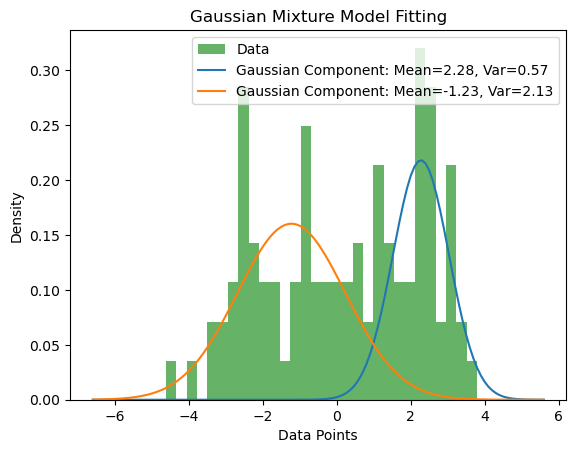

In [8]:
import math
import random
import matplotlib.pyplot as plt

def calculate_gaussian_density(x, mean, variance):
    """Calculate the probability density of x for a Gaussian with the given mean and variance."""
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-((x - mean) ** 2) / (2 * variance))

def initialize_parameters(data, num_components):
    """Randomly initialize the parameters of the Gaussian components."""
    means = [random.choice(data) for _ in range(num_components)]
    variances = [1.0 for _ in range(num_components)]
    weights = [1.0 / num_components for _ in range(num_components)]
    return means, variances, weights

def e_step(data, means, variances, weights):
    """Perform the Expectation step."""
    responsibilities = []
    for x in data:
        resp = []
        for mean, variance, weight in zip(means, variances, weights):
            prob = weight * calculate_gaussian_density(x, mean, variance)
            resp.append(prob)
        total_resp = sum(resp)
        responsibilities.append([r / total_resp for r in resp])
    return responsibilities

def m_step(data, responsibilities, num_components):
    """Perform the Maximization step."""
    n = len(data)
    means = []
    variances = []
    weights = []

    for j in range(num_components):
        weight_sum = sum(responsibilities[i][j] for i in range(n))
        mean = sum(responsibilities[i][j] * data[i] for i in range(n)) / weight_sum
        variance = sum(responsibilities[i][j] * (data[i] - mean) ** 2 for i in range(n)) / weight_sum
        weight = weight_sum / n

        means.append(mean)
        variances.append(variance)
        weights.append(weight)

    return means, variances, weights

def log_likelihood(data, means, variances, weights):
    """Compute the log-likelihood of the data given the parameters."""
    ll = 0
    for x in data:
        prob = 0
        for mean, variance, weight in zip(means, variances, weights):
            prob += weight * calculate_gaussian_density(x, mean, variance)
        ll += math.log(prob)
    return ll

def gmm_em(data, num_components, max_iterations=100, tol=1e-6):
    """Gaussian Mixture Model using the EM algorithm."""
    means, variances, weights = initialize_parameters(data, num_components)
    prev_ll = None

    for iteration in range(max_iterations):
        # E-step
        responsibilities = e_step(data, means, variances, weights)

        # M-step
        means, variances, weights = m_step(data, responsibilities, num_components)

        # Log-likelihood
        current_ll = log_likelihood(data, means, variances, weights)
        print(f"Iteration {iteration + 1}, Log-Likelihood: {current_ll}")

        # Check for convergence
        if prev_ll is not None and abs(current_ll - prev_ll) < tol:
            break
        prev_ll = current_ll

    return means, variances, weights

# Example usage
data = [random.gauss(-2, 1) if random.random() < 0.5 else random.gauss(2, 1) for _ in range(100)]
num_components = 2
means, variances, weights = gmm_em(data, num_components)

print("Final Parameters:")
print("Means:", means)
print("Variances:", variances)
print("Weights:", weights)

# Plotting the results
# Generate x values for plotting the Gaussian components
x_values = [i / 10.0 for i in range(int(min(data) * 10) - 20, int(max(data) * 10) + 20)]  # Range from data min to max

# Plot the original data as a histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Data")

# Plot the Gaussian components
for mean, variance, weight in zip(means, variances, weights):
    y_values = [weight * calculate_gaussian_density(x, mean, variance) for x in x_values]
    plt.plot(x_values, y_values, label=f"Gaussian Component: Mean={mean:.2f}, Var={variance:.2f}")

plt.xlabel("Data Points")
plt.ylabel("Density")
plt.legend()
plt.title("Gaussian Mixture Model Fitting")
plt.show()


##  K-means Clustering

The K-means clustering algorithm is a widely used method for partitioning a dataset into $ c $ clusters. The goal is to minimize the sum of squared distances from each point to its assigned cluster center.

From Eq. (22), the probability $ \hat{P}(\omega_i | x_k, \hat{\theta}) $ is large when the squared Mahalanobis distance $ (x_k - \hat{\mu}_i)^T \hat{\Sigma}_i^{-1} (x_k - \hat{\mu}_i) $ is small. However, we can simplify the computation by approximating this probability using the squared Euclidean distance $ \| x_k - \hat{\mu}_i \|^2 $ and assuming that:

$$
\hat{P}(\omega_i | x_k, \hat{\theta}) \approx
\begin{cases}
1 & \text{if } i = m \\
0 & \text{otherwise}
\end{cases}
$$

where $ m $ is the index of the nearest cluster center $ \hat{\mu}_m $ to $ x_k $. The iterative application of the Expectation-Maximization (EM) algorithm leads to the following procedure for finding the cluster centers $ \hat{\mu}_1, \hat{\mu}_2, \dots, \hat{\mu}_c $.

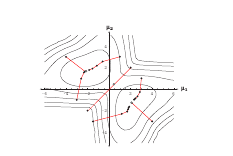

Fig.1: The k-means clustering procedure is a form of stochastic hill climbing in the log-likelihood function. The contours represent equal log-likelihood values for the one-dimensional data in Example 1. The dots indicate parameter values after diﬀerent iterations of the k-means algorithm. Six of the starting points shown lead to local maxima, whereas two (i.e., µ1 (0) = µ2 (0)) lead to a saddle point near µ = 0.

### K-means Algorithm:
1. **Initialization**: Choose the number of clusters $ c $ and initialize the cluster centers $ \hat{\mu}_1, \hat{\mu}_2, \dots, \hat{\mu}_c $.
2. **E-step**: Classify the data points into clusters according to the nearest cluster center.
3. **M-step**: Recompute the new cluster centers based on the current cluster assignments.
4. **Repeat** until no change in the cluster centers.

The computational complexity of the K-means algorithm is $ O(ndcT) $, where $ n $ is the number of samples, $ d $ is the number of features, and $ T $ is the number of iterations. In practice, $ T $ is generally much less than $ n $.

### Example Behavior of K-means Clustering:
Fig.1 shows the sequence of values for $ \hat{\mu}_1 $ and $ \hat{\mu}_2 $ obtained for several different starting points. The trajectories are symmetric about the line $ \hat{\mu}_1 = \hat{\mu}_2 $, leading either to the point $ \hat{\mu}_1 = -2.176, \hat{\mu}_2 = 1.684 $ or to its symmetric image.

---
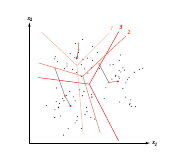

Fig.2: Trajectories for the means of the k-means clustering procedure applied to two-dimensional data. The ﬁnal Voronoi tesselation (for classiﬁcation) is also shown — the means correspond to the “centers” of the Voronoi cells.

##  Fuzzy K-means Clustering

In classical K-means clustering, each data point is assigned to exactly one cluster. However, in **fuzzy K-means clustering**, we relax this condition and allow each data point $ x_j $ to have a "fuzzy" membership in multiple clusters. The membership is represented by $ \mu_i(x_j) $, where:

$$
0 \leq \mu_i(x_j) \leq 1
$$

At its core, these fuzzy memberships are equivalent to the probabilities $ \hat{P}(\omega_i | x_j, \hat{\theta}) $. The goal is to minimize a global cost function:

$$
L = \sum_{i=1}^{c} \sum_{j=1}^{n} [\hat{P}(\omega_i | x_j)]^b \|x_j - \hat{\mu}_i\|^2
$$

where $ b > 1 $ is a parameter that adjusts the "blending" of different clusters. If $ b = 2 $, this criterion function reduces to the sum-of-squared errors criterion. The cluster membership probabilities are normalized as:

$$
\sum_{i=1}^{c} \hat{P}(\omega_i | x_j) = 1 \quad \text{for all} \quad j = 1, \dots, n.
$$

At the solution, the partial derivatives of $ L $ with respect to $ \hat{\mu}_i $ and $ \hat{P}(\omega_i | x_j) $ must be zero, leading to the following conditions:

1. **Recompute cluster centers**:

$$
\hat{\mu}_i = \frac{\sum_{j=1}^{n} [\hat{P}(\omega_i | x_j)]^b x_j}{\sum_{j=1}^{n} [\hat{P}(\omega_i | x_j)]^b}
$$

2. **Update the probabilities**:

$$
\hat{P}(\omega_i | x_j) = \frac{1}{\left(\sum_{r=1}^{c} \left( \frac{\| x_j - \hat{\mu}_i \|^2}{\| x_j - \hat{\mu}_r \|^2} \right)^{\frac{1}{b-1}} \right)}
$$

This process is performed iteratively until convergence.

### Fuzzy K-means Algorithm:
1. **Initialization**: Choose the number of clusters $ c $, set the fuzziness parameter $ b $, and initialize the cluster centers $ \hat{\mu}_1, \hat{\mu}_2, \dots, \hat{\mu}_c $.
2. **E-step**: Calculate the membership probabilities $ \hat{P}(\omega_i | x_j) $ for each data point $ x_j $ in relation to each cluster $ \omega_i $.
3. **M-step**: Recompute the cluster centers $ \hat{\mu}_1, \hat{\mu}_2, \dots, \hat{\mu}_c $ based on the membership probabilities.
4. **Repeat** until convergence.

The fuzzy k-means algorithm allows for soft assignment of data points to clusters, which is particularly useful when there is uncertainty in cluster assignments.


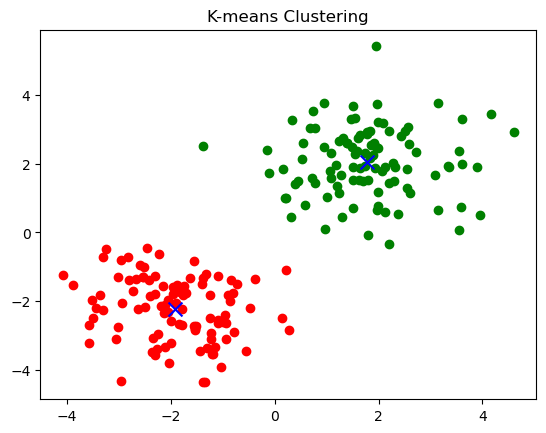

In [9]:
import random
import math
import matplotlib.pyplot as plt

def euc_distance(x, y):
    """Calculate Euclidean distance between two points."""
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))

def kmeans(data, k, max_iters=100):
    """K-means clustering algorithm."""
    # Randomly initialize centroids
    centroids = random.sample(data, k)
    prev_centroids = [None] * k
    clusters = [-1] * len(data)
    
    for _ in range(max_iters):
        # E-step: Assign points to nearest centroid
        for i, point in enumerate(data):
            distances = [euc_distance(point, centroid) for centroid in centroids]
            clusters[i] = distances.index(min(distances))
        
        # M-step: Recompute centroids
        for i in range(k):
            cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
            if cluster_points:
                centroids[i] = [sum(dim) / len(cluster_points) for dim in zip(*cluster_points)]
        
        # Check for convergence
        if centroids == prev_centroids:
            break
        prev_centroids = centroids.copy()
    
    return centroids, clusters

# Example usage
data = [(random.gauss(2, 1), random.gauss(2, 1)) for _ in range(100)] + \
       [(random.gauss(-2, 1), random.gauss(-2, 1)) for _ in range(100)]
k = 2

centroids, clusters = kmeans(data, k)

# Plotting results
colors = ['r', 'g']
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], color=colors[clusters[i]])
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='b', marker='x', s=100)
plt.title('K-means Clustering')
plt.show()


In [10]:
import random
import math
import matplotlib.pyplot as plt

def euc_distance(x, y):
    """Calculate Euclidean distance between two points."""
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))

def fuzzy_kmeans(data, k, b=2, max_iters=100):
    """Fuzzy K-means clustering algorithm."""
    # Randomly initialize centroids
    centroids = random.sample(data, k)
    n = len(data)
    
    # Initialize membership matrix
    memberships = [[random.random() for _ in range(k)] for _ in range(n)]
    for i in range(n):
        total = sum(memberships[i])
        memberships[i] = [m / total for m in memberships[i]]  # Normalize the memberships

    for _ in range(max_iters):
        # Update centroids
        for i in range(k):
            numerator = sum((memberships[j][i] ** b) * data[j] for j in range(n))
            denominator = sum(memberships[j][i] ** b for j in range(n))
            centroids[i] = [x / denominator for x in numerator]
        
        # Update membership values
        for i in range(n):
            for j in range(k):
                distances = [euc_distance(data[i], centroid) for centroid in centroids]
                distances_squared = [d ** 2 for d in distances]
                memberships[i][j] = 1 / sum([(distances_squared[j] / distances_squared[m]) ** (1 / (b - 1)) for m in range(k)])

        # Normalize membership values
        for i in range(n):
            total = sum(memberships[i])
            memberships[i] = [m / total for m in memberships[i]]

    return centroids, memberships

# Example usage
data = [(random.gauss(2, 1), random.gauss(2, 1)) for _ in range(100)] + \
       [(random.gauss(-2, 1), random.gauss(-2, 1)) for _ in range(100)]
k = 2
b = 2

centroids, memberships = fuzzy_kmeans(data, k, b)

# Plotting results
colors = ['r', 'g']
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], color=colors[round(memberships[i].index(max(memberships[i])))] )
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='b', marker='x', s=100)
plt.title('Fuzzy K-means Clustering')
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

## Fuzzy K-means Clustering Algorithm

In the **Fuzzy K-means clustering algorithm**, each sample $ x_j $ has a **fuzzy** membership in each of the clusters, unlike the classical **K-means** where each sample is assigned to exactly one cluster. The fuzzy membership is represented by $ P(\omega_i | x_j) $, which is the probability that the sample $ x_j $ belongs to cluster $ \omega_i $.

The algorithm works iteratively by adjusting the cluster centers $ \mu_i $ and the membership probabilities $ P(\omega_i | x_j) $ until convergence. The **objective** is to minimize the fuzzy cost function:

$$
L = \sum_{i=1}^{c} \sum_{j=1}^{n} \left[P(\omega_i | x_j)\right]^b ||x_j - \mu_i ||^2
$$

Where:
- $ c $ is the number of clusters
- $ n $ is the number of data points
- $ b > 1 $ is a parameter that controls the "fuzziness" of the clusters

### Steps of the Fuzzy K-means Algorithm

1. **Initialize** the number of clusters $ c $, cluster centers $ \mu_1, \mu_2, \dots, \mu_c $, and the membership probabilities $ P(\omega_i | x_j) $ for each point $ x_j $ for each cluster $ \omega_i $.
   
2. **Normalize** the probabilities of cluster memberships using the following equation:

$$
\sum_{i=1}^{c} P(\omega_i | x_j) = 1, \quad \text{for each } j = 1, 2, \dots, n
$$

3. **Classify** the samples based on the nearest cluster centroid $ \mu_i $.

4. **Recompute** the cluster centroids $ \mu_i $ by the weighted mean of the data points, based on their membership probabilities:

$$
\mu_i = \frac{\sum_{j=1}^{n} \left[P(\omega_i | x_j)\right]^b x_j}{\sum_{j=1}^{n} \left[P(\omega_i | x_j)\right]^b}
$$

5. **Recompute** the membership probabilities $ P(\omega_i | x_j) $ based on the distances between the data points and the centroids:

$$
P(\omega_i | x_j) = \frac{1}{\sum_{r=1}^{c} \left( \frac{d_{ij}}{d_{rj}} \right)^{\frac{2}{b-1}}}
$$

Where $ d_{ij} = ||x_j - \mu_i||^2 $ is the squared Euclidean distance between the data point $ x_j $ and the centroid $ \mu_i $.

6. Repeat steps 3-5 until there is **no change** in both the centroids $ \mu_i $ and the membership probabilities $ P(\omega_i | x_j) $.

7. **Return** the final cluster centers $ \mu_1, \mu_2, \dots, \mu_c $.

### Convergence and Special Case

At each iteration, the cluster centers move based on the fuzzy membership of the points, and the probabilities $ P(\omega_i | x_j) $ approach either 0 or 1 as the algorithm converges. After convergence, each point is mostly assigned to one cluster, resembling the classical K-means method.

In the special case where the membership probabilities $ P(\omega_i | x_j) $ are hard (i.e., the point belongs to exactly one cluster), the algorithm reduces to **K-means**. The membership is given by:

$$
P(\omega_i | x_j) = 
\begin{cases} 
1 & \text{if } \|x_j - \mu_i\| < \|x_j - \mu_k\| \text{ for all } k \neq i, \\
0 & \text{otherwise}.
\end{cases}
$$

### Fuzzy K-means Example Visualization

At each iteration, the probability of category memberships for each point are adjusted according to the membership function. The boundaries of the **Voronoi tessellation** are drawn to illustrate the progress of the algorithm. After several iterations, the cluster centers and boundaries converge to provide the final clustering result.

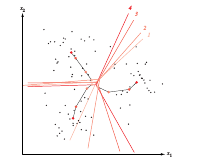

Fig.3: At each iteration of the fuzzy k-means clustering algorithm, the prob- ability of category memberships for each point are adjusted according to Eqs. 27 & 28 (here b = 2). While most points have non-negligible memberships in two or three clusters, we nevertheless draw the boundary of a Voronoi tesselation to illustrate the progress of the algorithm. After four iterations, the algorithm has converged and the red cluster centers and associated Voronoi tesselation would be used for assigning new points to clusters.

As shown in **Fig.3**:

- Initially, the cluster centers are near the center of the dataset because each point has a non-negligible membership in all clusters.
- Over time, the centers separate, and each membership tends toward 0 or 1.


In [11]:
import random
import numpy as np

def fuzzy_kmeans(data, c, b=2, max_iter=100, tol=1e-6):
    """
    Fuzzy K-means clustering algorithm.
    
    Parameters:
    - data: List of data points (each data point is a list/tuple of features)
    - c: Number of clusters
    - b: Fuzziness parameter (default is 2)
    - max_iter: Maximum number of iterations
    - tol: Convergence tolerance
    
    Returns:
    - centers: Final cluster centers
    - memberships: Fuzzy membership matrix
    """
    n = len(data)  # Number of data points
    d = len(data[0])  # Number of features
    
    # Randomly initialize the cluster centers
    centers = random.sample(data, c)
    
    # Initialize membership matrix
    memberships = np.zeros((n, c))
    
    def compute_distances(data, centers):
        """Calculate the squared Euclidean distance between each data point and the cluster centers."""
        distances = np.zeros((n, c))
        for i in range(n):
            for j in range(c):
                distances[i][j] = np.sum((np.array(data[i]) - np.array(centers[j])) ** 2)
        return distances
    
    def update_memberships(distances, b):
        """Update the membership matrix based on the current distances."""
        memberships = np.zeros((n, c))
        for i in range(n):
            for j in range(c):
                denominator = sum((distances[i][j] / distances[i][k]) ** (2 / (b - 1)) for k in range(c))
                memberships[i][j] = 1 / denominator
        return memberships
    
    def update_centers(data, memberships, b):
        """Update the cluster centers based on the membership matrix."""
        new_centers = []
        for j in range(c):
            numerator = np.zeros(d)
            denominator = 0
            for i in range(n):
                weight = memberships[i][j] ** b
                numerator += weight * np.array(data[i])
                denominator += weight
            new_centers.append(numerator / denominator)
        return new_centers
    
    for iteration in range(max_iter):
        # Compute distances between data points and cluster centers
        distances = compute_distances(data, centers)
        
        # Update the membership matrix
        new_memberships = update_memberships(distances, b)
        
        # Update the cluster centers
        new_centers = update_centers(data, new_memberships, b)
        
        # Check for convergence (if the centers and memberships haven't changed)
        if np.allclose(centers, new_centers, atol=tol) and np.allclose(memberships, new_memberships, atol=tol):
            print(f"Converged in {iteration + 1} iterations")
            break
        
        # Update centers and memberships for the next iteration
        centers = new_centers
        memberships = new_memberships
        
    return centers, memberships

# Example usage
data = [
    [1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0],
    [1.0, 0.6], [9.0, 11.0], [8.0, 2.0], [10.0, 2.0]
]  # 2D data points

c = 2  # Number of clusters
centers, memberships = fuzzy_kmeans(data, c, b=2, max_iter=100)

print("Final cluster centers:")
for center in centers:
    print(center)

print("\nFuzzy membership matrix:")
print(memberships)


Final cluster centers:
[nan nan]
[nan nan]

Fuzzy membership matrix:
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
import random

def fuzzy_kmeans(data, c, b=2, max_iter=100, tol=1e-6):
    """
    Fuzzy K-means clustering algorithm in pure Python.
    
    Parameters:
    - data: List of data points (each data point is a list/tuple of features)
    - c: Number of clusters
    - b: Fuzziness parameter (default is 2)
    - max_iter: Maximum number of iterations
    - tol: Convergence tolerance
    
    Returns:
    - centers: Final cluster centers
    - memberships: Fuzzy membership matrix
    """
    n = len(data)  # Number of data points
    d = len(data[0])  # Number of features
    
    # Randomly initialize the cluster centers
    centers = random.sample(data, c)
    
    # Initialize membership matrix
    memberships = [[0 for _ in range(c)] for _ in range(n)]
    
    def compute_distances(data, centers):
        """Calculate the squared Euclidean distance between each data point and the cluster centers."""
        distances = []
        for i in range(n):
            dist_row = []
            for j in range(c):
                dist = sum((data[i][k] - centers[j][k]) ** 2 for k in range(d))
                dist_row.append(dist)
            distances.append(dist_row)
        return distances
    
    def update_memberships(distances, b):
        """Update the membership matrix based on the current distances."""
        memberships = [[0 for _ in range(c)] for _ in range(n)]
        for i in range(n):
            for j in range(c):
                denominator = sum((distances[i][j] / distances[i][k]) ** (2 / (b - 1)) for k in range(c))
                memberships[i][j] = 1 / denominator
        return memberships
    
    def update_centers(data, memberships, b):
        """Update the cluster centers based on the membership matrix."""
        new_centers = []
        for j in range(c):
            numerator = [0] * d
            denominator = 0
            for i in range(n):
                weight = memberships[i][j] ** b
                for k in range(d):
                    numerator[k] += weight * data[i][k]
                denominator += weight
            new_centers.append([x / denominator for x in numerator])
        return new_centers
    
    for iteration in range(max_iter):
        # Compute distances between data points and cluster centers
        distances = compute_distances(data, centers)
        
        # Update the membership matrix
        new_memberships = update_memberships(distances, b)
        
        # Update the cluster centers
        new_centers = update_centers(data, new_memberships, b)
        
        # Check for convergence (if the centers and memberships haven't changed)
        if all(abs(new_centers[j][k] - centers[j][k]) < tol for j in range(c) for k in range(d)) and \
           all(all(abs(new_memberships[i][j] - memberships[i][j]) < tol for j in range(c)) for i in range(n)):
            print(f"Converged in {iteration + 1} iterations")
            break
        
        # Update centers and memberships for the next iteration
        centers = new_centers
        memberships = new_memberships
        
    return centers, memberships

# Example usage
data = [
    [1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0],
    [1.0, 0.6], [9.0, 11.0], [8.0, 2.0], [10.0, 2.0]
]  # 2D data points

c = 2  # Number of clusters
centers, memberships = fuzzy_kmeans(data, c, b=2, max_iter=100)

print("Final cluster centers:")
for center in centers:
    print(center)

print("\nFuzzy membership matrix:")
for row in memberships:
    print(row)
